In [2]:
from qiskit import QuantumCircuit, Aer, assemble, transpile
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

import numpy as np

# Exercice 1 - Algorithme de Deutsch-Josza

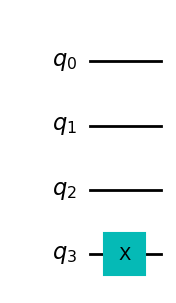

In [3]:
n = 3
const_oracle = QuantumCircuit(n+1)
const_oracle.x(n)

const_oracle.draw('mpl')

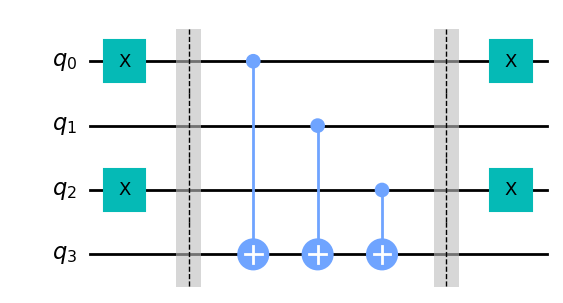

In [9]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.barrier()

for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)


balanced_oracle.draw('mpl')

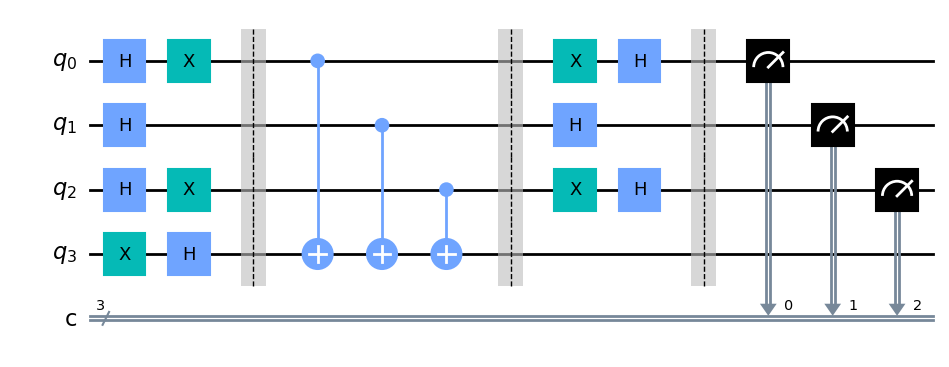

In [10]:
dj_circuit = QuantumCircuit(n+1, n)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.x(n)
dj_circuit.h(n)

#dj_circuit += balanced_oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.barrier()

for qubit in range(n):
    dj_circuit.measure(qubit, qubit)

dj_circuit.draw('mpl')

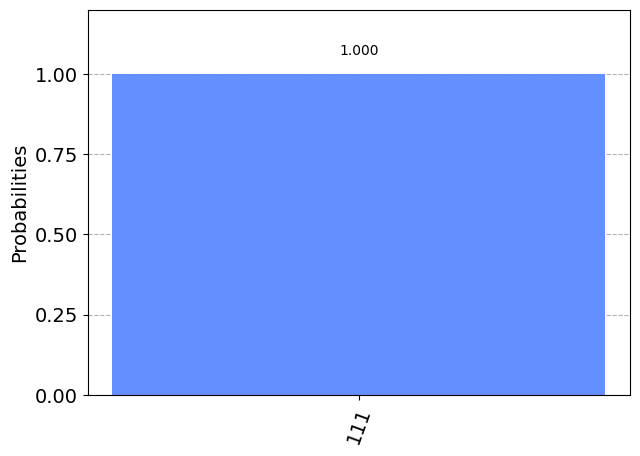

In [11]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [12]:
def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    
    if case == "balanced":
        b = np.random.randint(1, 2**n)
        b_str = format(b, '0'+str(n)+'b')
        
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
    
    if case == "constant":
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    dj_circuit.x(n)
    dj_circuit.h(n)
    for qubit in range(n):
        dj_circuit.h(qubit)
    dj_circuit.append(oracle, range(n+1))
    for qubit in range(n):
        dj_circuit.h(qubit)
    for i in range(n):
        dj_circuit.measure(i, i)
    return dj_circuit

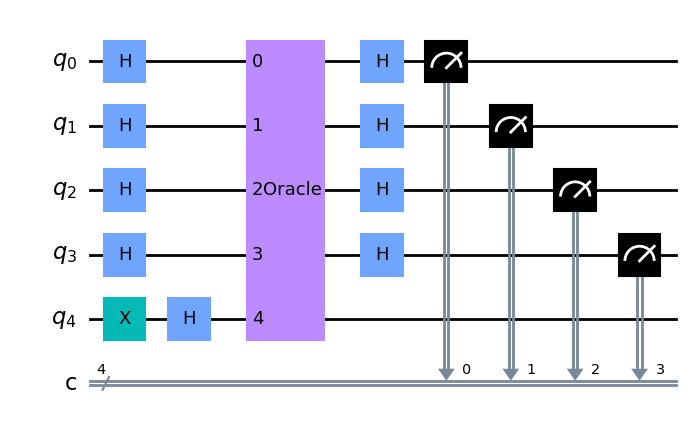

In [13]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

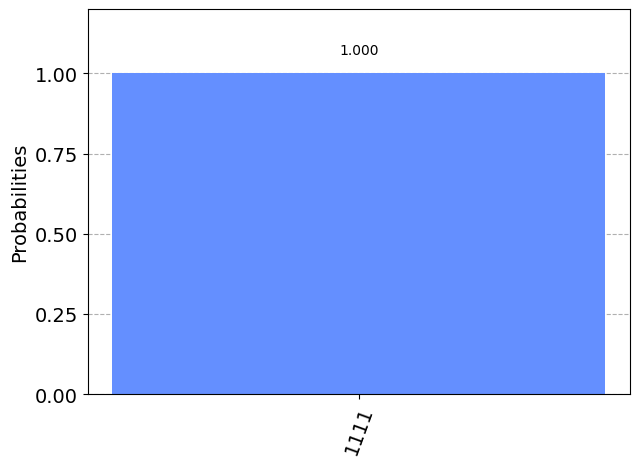

In [14]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

# Exercice 2 - Algorithme de Simon

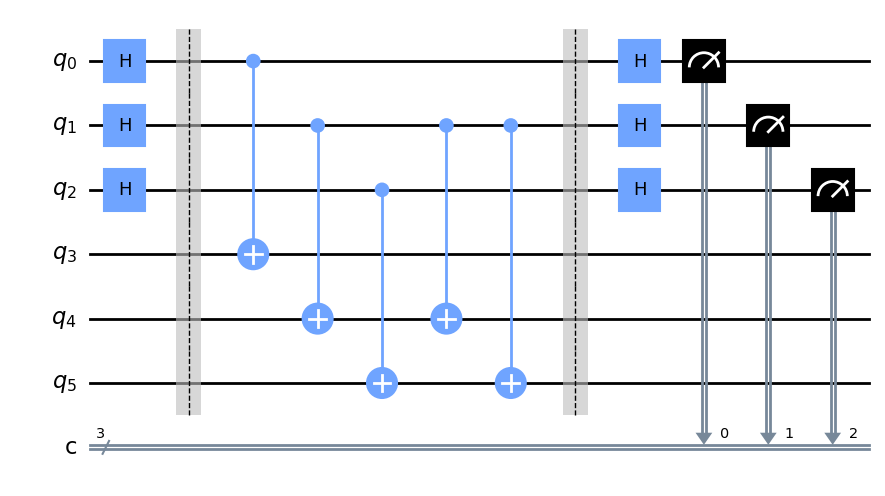

In [15]:
b = '110'
n = len(b)

simon_circuit = QuantumCircuit(2*n, n)

simon_circuit.h(range(n))

simon_circuit.barrier()
simon_circuit = simon_circuit.compose(simon_oracle(b))
simon_circuit.barrier()

simon_circuit.h(range(n))
simon_circuit.measure(range(n), range(n))

simon_circuit.draw('mpl')

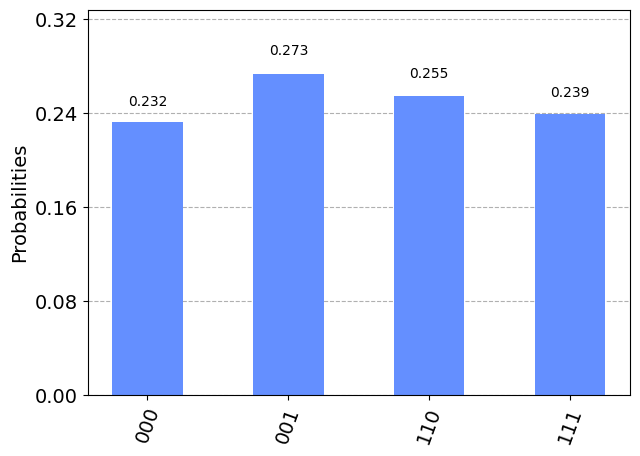

In [16]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [17]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

# Dans le cas où on aurait pas la séquence de bits b, on peut la rechercher avec la boucle suivante :
# Il suffit de prendre la séquence qui est orthogonale à tous les counts (ie: tous les produits scalaires sont nuls)
# Normalement, on retombe bien sur le b originel.

for i in range(1,2**n):
    b2 = bin(i)[2:].zfill(3)
    for z in counts:
        print('{}.{} = {} (mod 2)'.format(b2, z, bdotz(b2,z)))
    print('------------------------------')

001.110 = 0 (mod 2)
001.000 = 0 (mod 2)
001.001 = 1 (mod 2)
001.111 = 1 (mod 2)
------------------------------
010.110 = 1 (mod 2)
010.000 = 0 (mod 2)
010.001 = 0 (mod 2)
010.111 = 1 (mod 2)
------------------------------
011.110 = 1 (mod 2)
011.000 = 0 (mod 2)
011.001 = 1 (mod 2)
011.111 = 0 (mod 2)
------------------------------
100.110 = 1 (mod 2)
100.000 = 0 (mod 2)
100.001 = 0 (mod 2)
100.111 = 1 (mod 2)
------------------------------
101.110 = 1 (mod 2)
101.000 = 0 (mod 2)
101.001 = 1 (mod 2)
101.111 = 0 (mod 2)
------------------------------
110.110 = 0 (mod 2)
110.000 = 0 (mod 2)
110.001 = 0 (mod 2)
110.111 = 0 (mod 2)
------------------------------
111.110 = 0 (mod 2)
111.000 = 0 (mod 2)
111.001 = 1 (mod 2)
111.111 = 1 (mod 2)
------------------------------
